<a href="https://colab.research.google.com/github/Aditya17-bot/Fraud_detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [ ]:
data = pd.read_csv('creditcard.csv',sep=',')
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

/tmp/ipython-input-3457045676.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


Text(0, 0.5, 'Frequency')

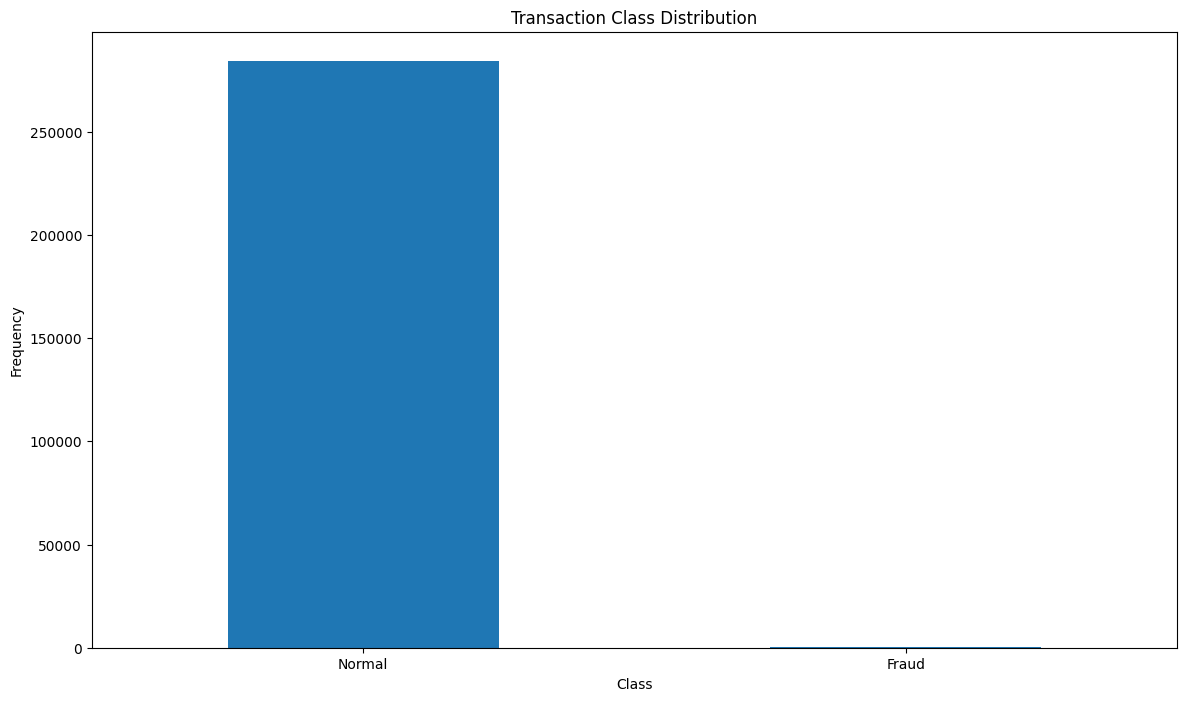

In [ ]:
data.info()
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
fraud = data[data['Class']==1]

normal = data[data['Class']==0]

print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [ ]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
normal.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


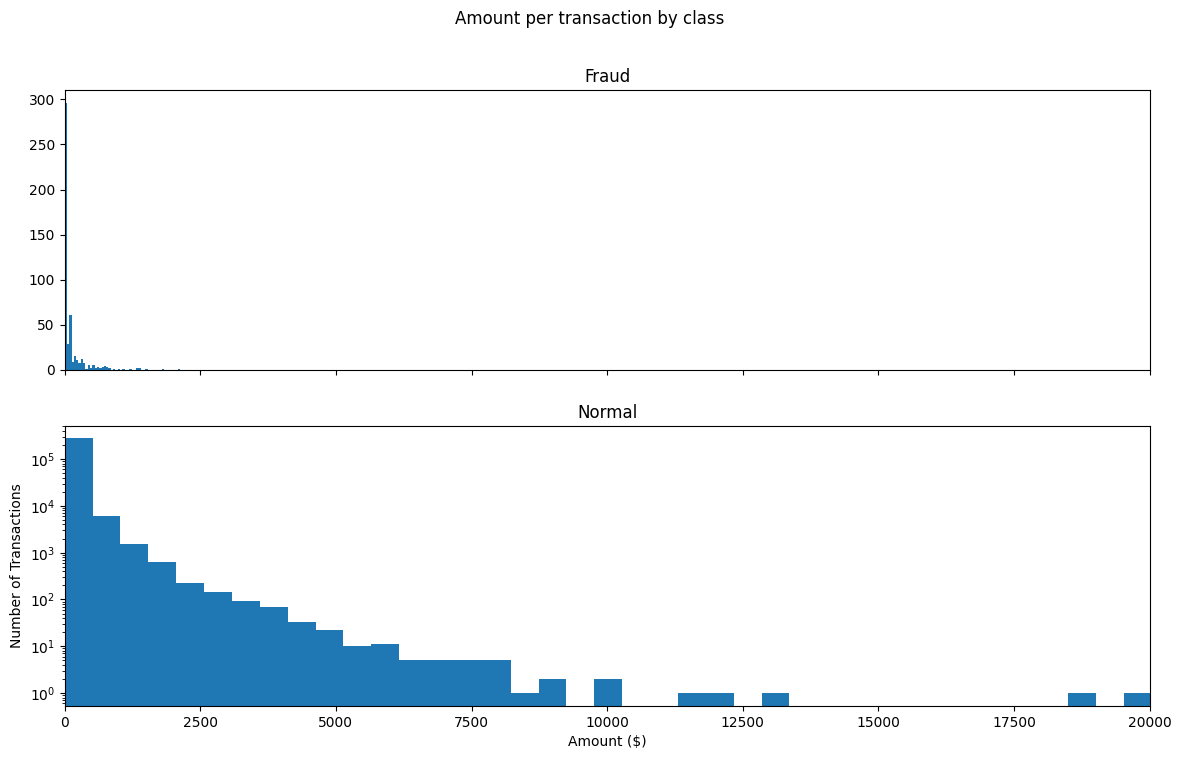

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

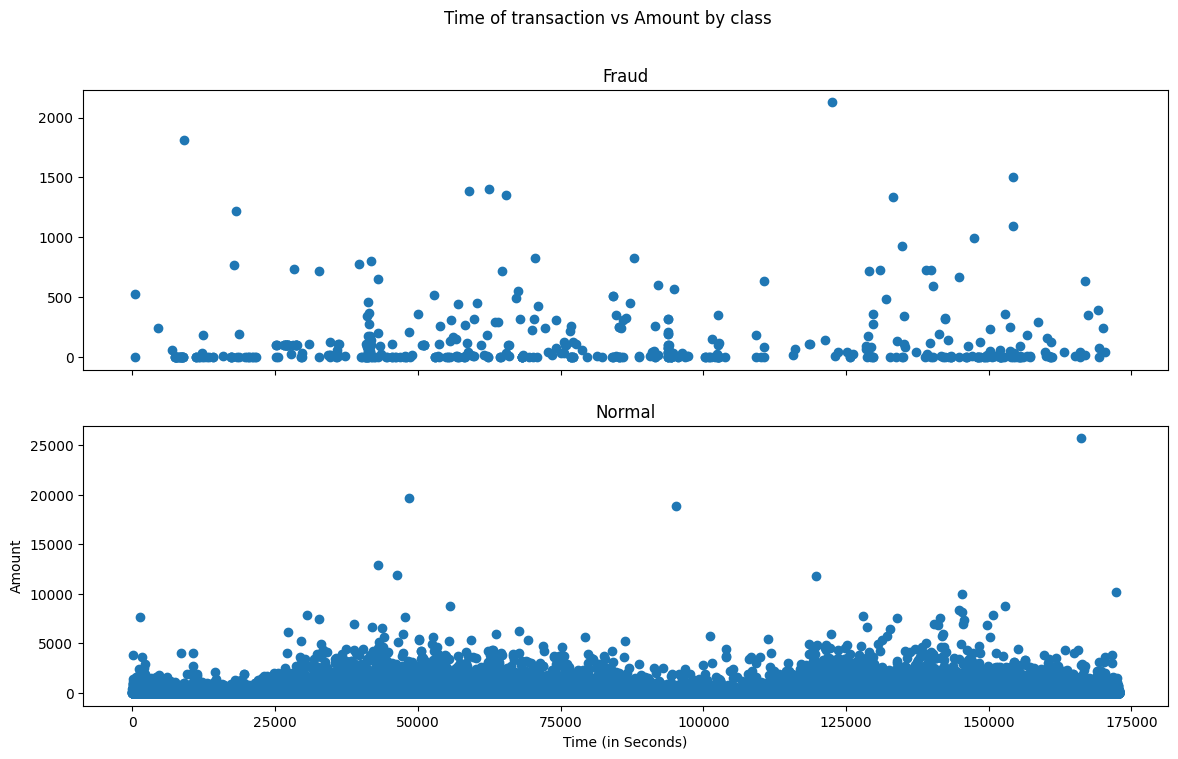

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [ ]:
data1= data.sample(frac = 0.1,random_state=1)

data1.shape

(28481, 31)

In [ ]:
Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


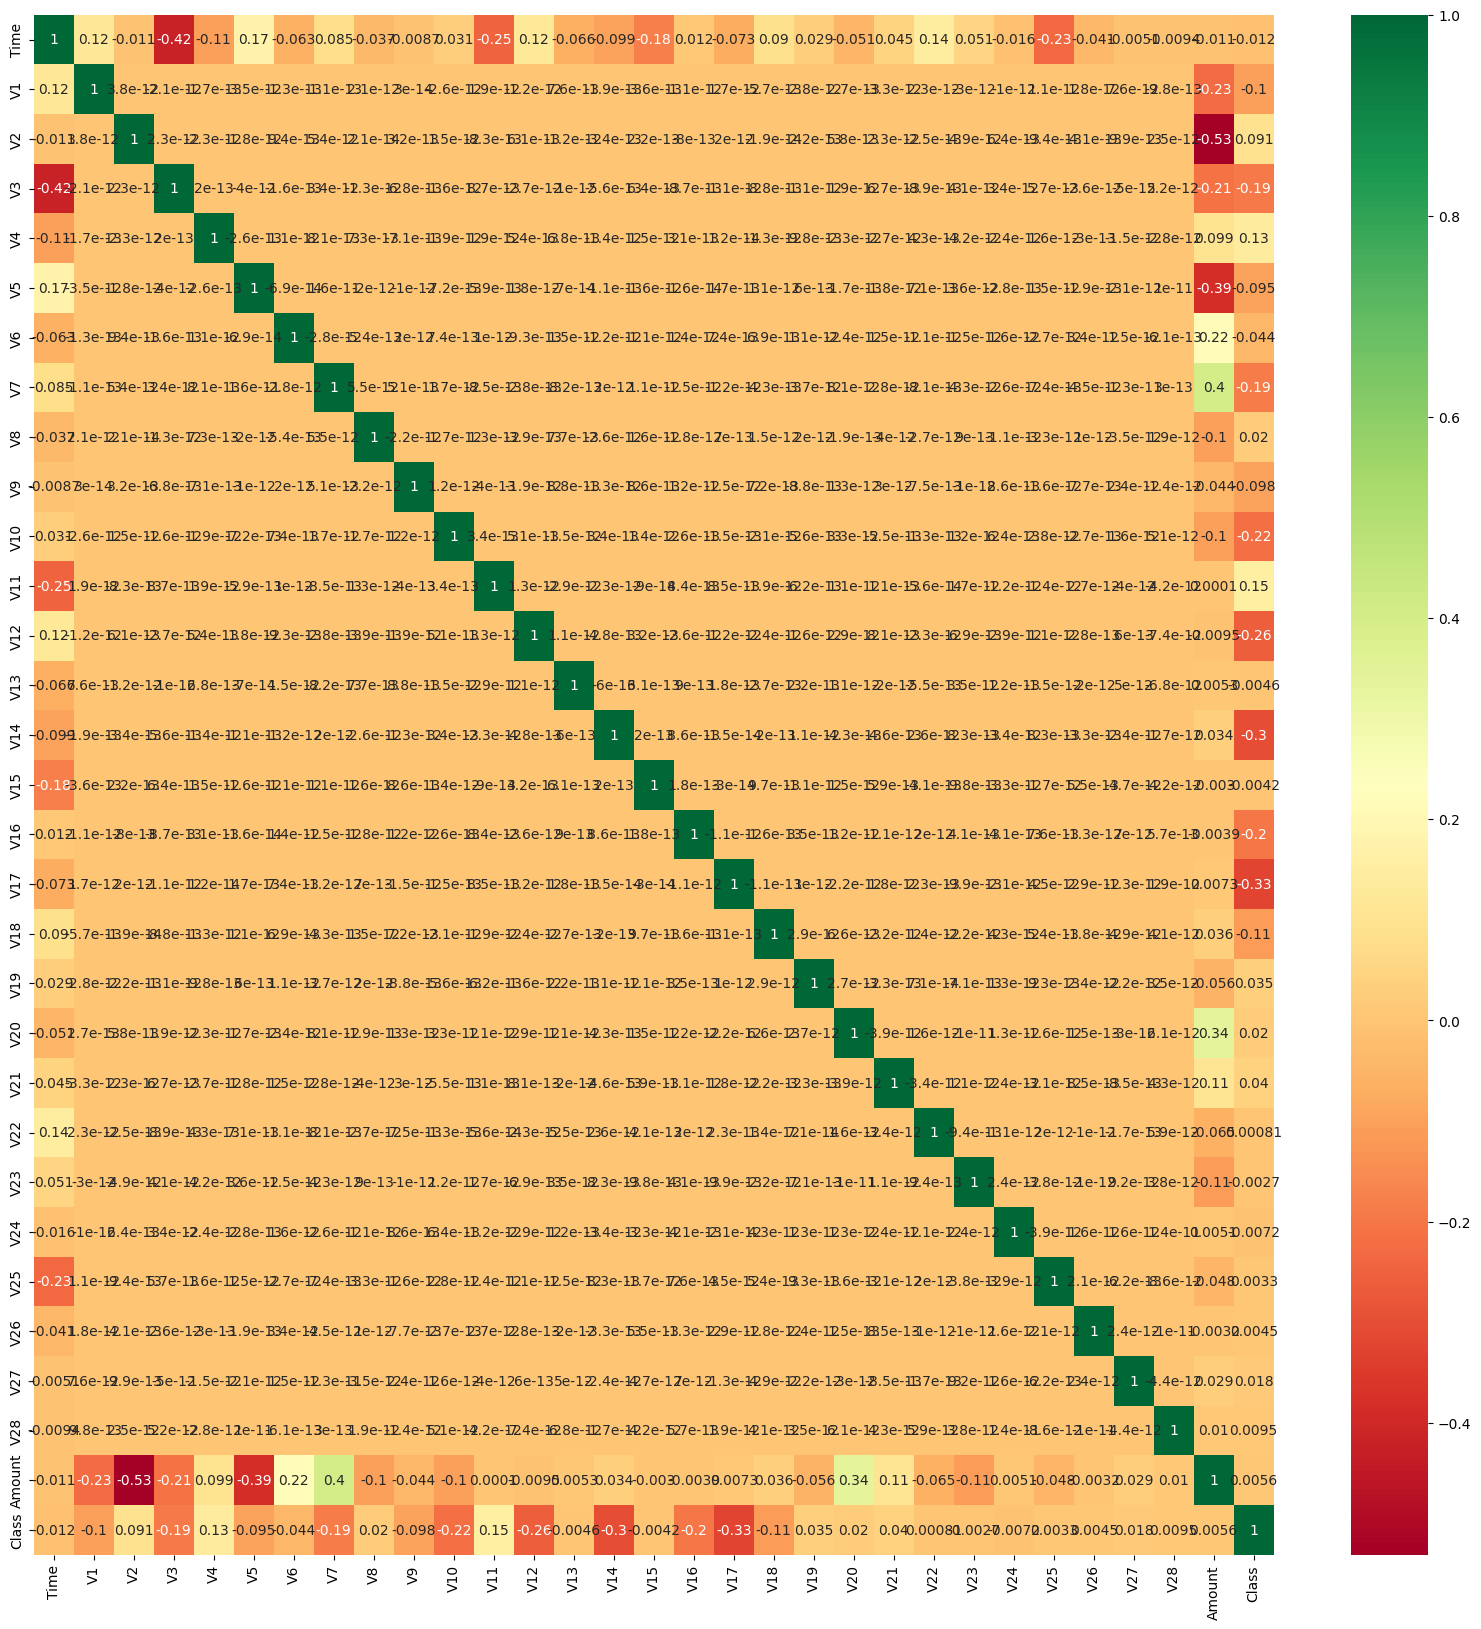

In [ ]:
import seaborn as sns

corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#inde andx depe variables
columns = data1.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]
target = "Class"
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [ ]:
from imblearn.over_sampling import SMOTE


features_matrix = X
true_labels = Y


smote_balancer = SMOTE(random_state=42)

balanced_features, balanced_labels = smote_balancer.fit_resample(features_matrix, true_labels)

print("Balanced dataset shapes:", balanced_features.shape, balanced_labels.shape)

import numpy as np

unique, counts = np.unique(balanced_labels, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class distribution:", class_distribution)

ratio = counts[0] / counts[1]
print("Class 0:Class 1 ratio:", ratio)




Balanced dataset shapes: (56864, 30) (56864,)
Class distribution: {np.int64(0): np.int64(28432), np.int64(1): np.int64(28432)}
Class 0:Class 1 ratio: 1.0


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report

# Use the balanced dataset from SMOTE
X_bal = balanced_features       # feature matrix from SMOTE
Y_bal = balanced_labels         # label vector from SMOTE

# Set contamination to the outlier fraction in the balanced dataset
n_outliers = sum(Y_bal == 1)                           # Number of frauds (outliers)
contamination = n_outliers / float(len(Y_bal))         # Should be 0.5 if dataset is perfectly balanced

clf = IsolationForest(
    n_estimators=200,
    max_samples=0.6,
    contamination=contamination,
    random_state=42,
    verbose=0
)

clf.fit(X_bal)
scores_prediction = clf.decision_function(X_bal)
y_pred = clf.predict(X_bal)

# Convert predictions: 1 (normal) → 0, -1 (outlier) → 1
y_pred = [0 if x == 1 else 1 for x in y_pred]

n_errors = (y_pred != Y_bal).sum() if hasattr(Y_bal, "__iter__") else sum(y_pred != Y_bal)
print("Isolation Forest Results:")
print(f"Number of errors: {n_errors}")
print("Accuracy Score:")
print(accuracy_score(Y_bal, y_pred))
print("Classification Report:")
print(classification_report(Y_bal, y_pred))



Isolation Forest Results:
Number of errors: 13854
Accuracy Score:
0.7563660664040518
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76     28432
           1       0.76      0.76      0.76     28432

    accuracy                           0.76     56864
   macro avg       0.76      0.76      0.76     56864
weighted avg       0.76      0.76      0.76     56864



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Split before balancing
X_train, X_test, y_train, y_test = train_test_split(
    features_matrix, true_labels, test_size=0.2, random_state=42, stratify=true_labels
)

# Apply SMOTE only to training set
smote_balancer = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote_balancer.fit_resample(X_train, y_train)

# Train
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf.fit(X_train_bal, y_train_bal)

# Predict on untouched test set
y_pred_rf = rf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))



Confusion Matrix:
 [[5687    0]
 [   3    7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5687
           1       1.00      0.70      0.82        10

    accuracy                           1.00      5697
   macro avg       1.00      0.85      0.91      5697
weighted avg       1.00      1.00      1.00      5697

Accuracy: 0.9994734070563455


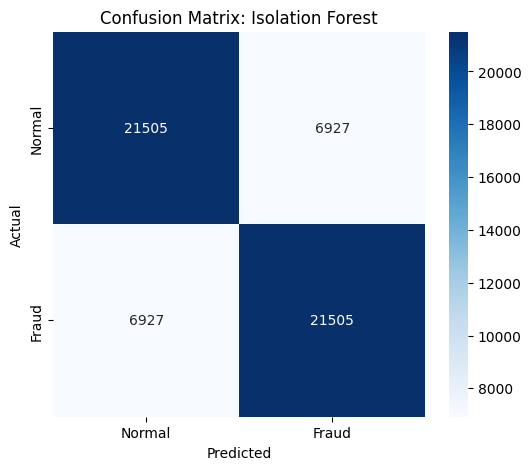

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_iso = confusion_matrix(Y_bal, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_iso, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Isolation Forest')
plt.show()


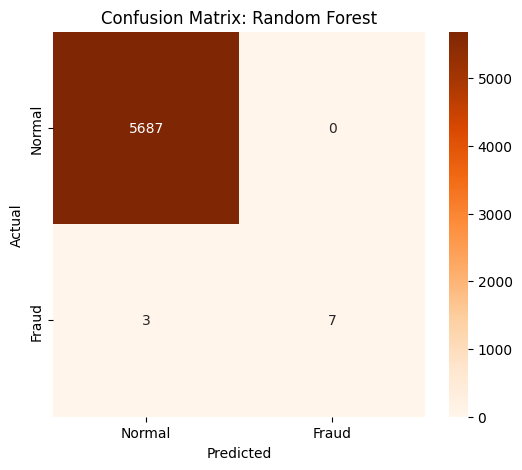

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Random Forest')
plt.show()
